In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# read in the dataframe

df = pd.read_csv('/Users/juhee/Desktop/GA/Submissions/Projects/project_3-master/data/reddit_final.csv')

In [4]:
# check the shape and the first 5 rows

print(df.shape)
df.head()

(5995, 5)


,subreddit,text_all,y,texts_cleaned,post_w_cnt
0,relationship_advice,BI 58 Male Caught With Guy I'am a bi 58 year o...,1,bi male caught with guy i am a year old have...,139
1,legaladvice,When a dealer gets arrested do his roommates g...,0,when a dealer get arrested do his roommate get...,36
2,relationship_advice,My(14M) friend (14F) that I’ve been talking to...,1,my m friend f that i ve been talking to just t...,184
3,relationship_advice,Did my boyfriend and I make the right assumpti...,1,did my boyfriend and i make the right assumpti...,356
4,relationship_advice,Tough patch in our relationship of four years ...,1,tough patch in our relationship of four year m...,206


### EDA

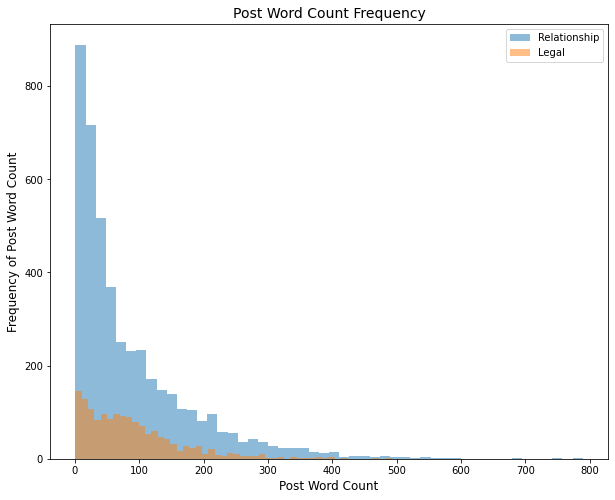

In [4]:
# distribution of word counts 

plt.figure(figsize = (10, 8))

plt.hist(df[df['subreddit'] == 'relationship_advice']['post_w_cnt'], bins = 50, alpha = 0.5, label = 'Relationship')
plt.hist(df[df['subreddit'] == 'legaladvice']['post_w_cnt'], bins = 50, alpha = 0.5, label = 'Legal')
plt.xlabel('Post Word Count', size = 12)
plt.ylabel('Frequency of Post Word Count', size = 12)
plt.title('Post Word Count Frequency', size = 14)

plt.legend()
plt.savefig('./images/post_word_count.png');

In [5]:
# set X for vectorization

X = df['texts_cleaned']


### CountVectorizer

In [6]:
# instantiate countvectorizer with stopwords

cvec = CountVectorizer(stop_words = 'english')

In [7]:
# transform and fit on X_train, and transform X_test

X_cv = cvec.fit_transform(X)

print(X_cv.shape)

(5995, 16608)


In [8]:
# turn X_train to a dataframe

X_cv_df = pd.DataFrame(X_cv.toarray(), 
                       columns = cvec.get_feature_names())

In [9]:
# get count of common words

# empty dictionary

common = {}

# loop through columns

for col in X_cv_df.columns:
    
    # save sum of each column in dictionary
    common[col] = X_cv_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common = pd.DataFrame(sorted(common.items(), key = lambda x: x[1], reverse = True))

In [10]:
# find top 20 words

most_common[:20]

,0,1
0,just,2295
1,like,2284
2,wa,2271
3,want,2178
4,time,2143
5,know,1993
6,don,1919
7,year,1812
8,thing,1710
9,ha,1601


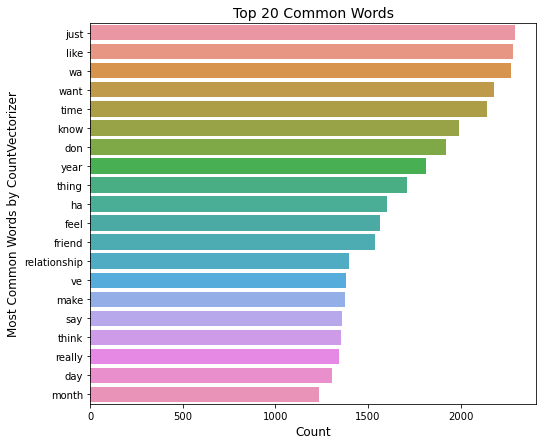

In [12]:
# plot top 20 words 

plt.figure(figsize = (8, 7))

sns.barplot(most_common[1][:20], most_common[0][:20])
plt.xlabel('Count', size = 12)
plt.ylabel('Most Common Words by CountVectorizer', size = 12)
plt.title('Top 20 Common Words', size = 14)
plt.savefig('/Users/juhee/Desktop/GA/Submissions/Projects/project_3-master/images/most_common20.png');

In [12]:
## find the top 20 words for relationship advice and legal advice

sub1 = df[df['subreddit'] == 'legaladvice']['texts_cleaned']
sub2 = df[df['subreddit'] == 'relationship_advice']['texts_cleaned']

# instantiate another cvecs

cvec_legal = CountVectorizer(stop_words = 'english')
cvec_relationship = CountVectorizer(stop_words = 'english')

# transform and fit

sub1 = cvec_legal.fit_transform(sub1)
sub2 = cvec_relationship.fit_transform(sub2)

# turb above to dataframes

sub1_df = pd.DataFrame(sub1.toarray(), 
                       columns = cvec_legal.get_feature_names())

sub2_df = pd.DataFrame(sub2.toarray(),
                       columns = cvec_relationship.get_feature_names())

## get count of common words

# empty dictionaries

common_legal = {}
common_relationship = {}

# loop through columns in sub1_df

for col in sub1_df.columns:
    
    # save sum of each column in dictionary
    common_legal[col] = sub1_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common_legal = pd.DataFrame(sorted(common_legal.items(), key = lambda x: x[1], reverse = True))

# loop through columns in sub2_df

for col in sub2_df.columns:
    
    # save sum of each column in dictionary
    common_relationship[col] = sub2_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common_relationship = pd.DataFrame(sorted(common_relationship.items(), key = lambda x: x[1], reverse = True))

In [13]:
# top 20 words in legal advice

most_common_legal[:20]

,0,1
0,wa,692
1,just,479
2,ha,444
3,time,440
4,year,393
5,know,387
6,want,380
7,don,331
8,work,315
9,month,313


In [14]:
# top 20 words in relationship advice

most_common_relationship[:20]

,0,1
0,like,1977
1,just,1816
2,want,1798
3,time,1703
4,know,1606
5,don,1588
6,wa,1579
7,thing,1466
8,feel,1448
9,year,1419


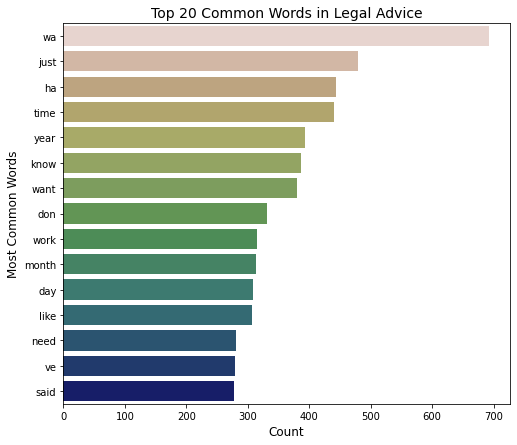

In [15]:
# plot top 20 words in legal advice

plt.figure(figsize = (8, 7))

sns.barplot(most_common_legal[1][:15], most_common_legal[0][:15], palette = 'gist_earth_r')
plt.xlabel('Count', size = 12)
plt.ylabel('Most Common Words', size = 12)
plt.title('Top 20 Common Words in Legal Advice', size = 14)
plt.savefig('./images/most_common_legal20.png');

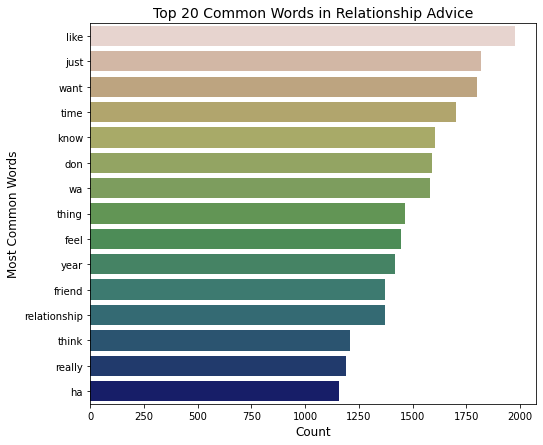

In [16]:
# plot top 20 words in legal advice

plt.figure(figsize = (8, 7))

sns.barplot(most_common_relationship[1][:15], most_common_relationship[0][:15], palette = 'gist_earth_r')
plt.xlabel('Count', size = 12)
plt.ylabel('Most Common Words', size = 12)
plt.title('Top 20 Common Words in Relationship Advice', size = 14)
plt.savefig('./images/most_common_relationship20.png');

### TfidVectorizer

In [17]:
# Instantiate the transformer

tvec = TfidfVectorizer(stop_words = 'english')

In [18]:
# transform and fit

tfid = tvec.fit_transform(X)

In [19]:
tfid = pd.DataFrame(tfid.toarray(),
                    columns = tvec.get_feature_names())

In [20]:
# get count of most common words

common_tf = {}

for col in tfid.columns:
    
    common_tf[col] =  tfid[col].sum()
    
# common_tf to dataframe sorted by highest occurance

most_common_tf = pd.DataFrame(sorted(common_tf.items(), key = lambda x: x[1], reverse = True))

In [21]:
# top 20 words

most_common_tf[:20]

,0,1
0,like,137.805088
1,just,136.494663
2,want,132.154828
3,don,127.725783
4,wa,121.132760
5,know,120.163401
6,time,119.263961
7,friend,109.892634
8,year,108.797903
9,thing,103.571146


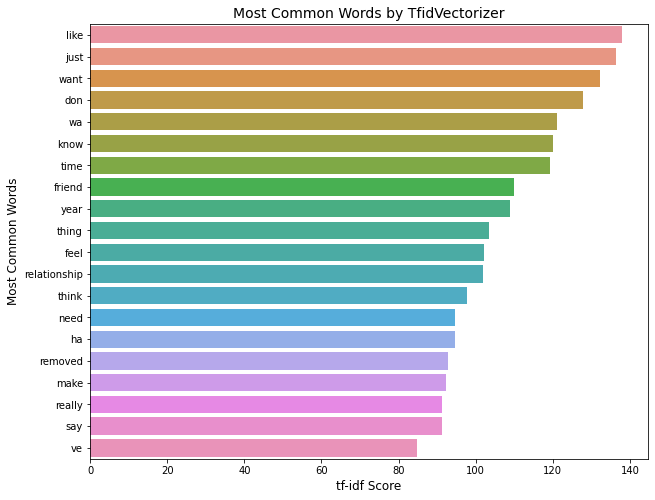

In [22]:
# plot the top 20 words

plt.figure(figsize = (10, 8))

sns.barplot(most_common_tf[1][:20], most_common_tf[0][:20])
plt.xlabel('tf-idf Score', size = 12)
plt.ylabel('Most Common Words', size = 12)
plt.title('Most Common Words by TfidVectorizer', size = 14)
plt.savefig('./images/most_common_tfid.png');

In [23]:
## find the top 20 words for relationship advice and legal advice

sub1 = df[df['subreddit'] == 'legaladvice']['texts_cleaned']
sub2 = df[df['subreddit'] == 'relationship_advice']['texts_cleaned']

# instantiate another tvecs

tvec_legal = TfidfVectorizer(stop_words = 'english')
tvec_relationship = TfidfVectorizer(stop_words = 'english')

# transform and fit

sub1 = tvec_legal.fit_transform(sub1)
sub2 = tvec_relationship.fit_transform(sub2)

# turb above to dataframes

sub1_df = pd.DataFrame(sub1.toarray(), 
                       columns = tvec_legal.get_feature_names())

sub2_df = pd.DataFrame(sub2.toarray(),
                       columns = tvec_relationship.get_feature_names())

## get count of common words

# empty dictionaries

common_legal = {}
common_relationship = {}

# loop through columns in sub1_df

for col in sub1_df.columns:
    
    # save sum of each column in dictionary
    common_legal[col] = sub1_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common_legal = pd.DataFrame(sorted(common_legal.items(), key = lambda x: x[1], reverse = True))

# loop through columns in sub2_df

for col in sub2_df.columns:
    
    # save sum of each column in dictionary
    common_relationship[col] = sub2_df[col].sum()  
    
# common to dataframe sorted by highest occurance

most_common_relationship = pd.DataFrame(sorted(common_relationship.items(), key = lambda x: x[1], reverse = True))

In [24]:
# top 20 words in legal advice

most_common_legal[:20]

,0,1
0,removed,45.959336
1,wa,34.059431
2,just,29.140149
3,ha,26.578168
4,time,26.276201
5,want,25.773421
6,year,24.976727
7,know,24.795605
8,don,22.595290
9,work,21.848497


In [25]:
# top 20 words in relationship advice

most_common_relationship[:20]

,0,1
0,like,116.585448
1,just,110.386166
2,want,108.399734
3,don,106.198747
4,know,97.668775
5,time,95.785023
6,friend,94.970678
7,relationship,91.154861
8,wa,91.013992
9,feel,88.909808


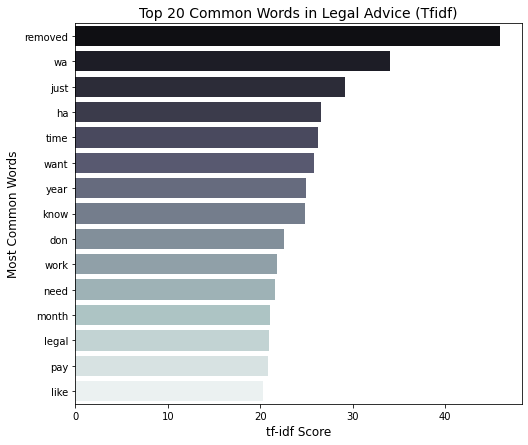

In [26]:
# plot top 20 words in legal advice

plt.figure(figsize = (8, 7))

sns.barplot(most_common_legal[1][:15], most_common_legal[0][:15], palette = 'bone')
plt.xlabel('tf-idf Score', size = 12)
plt.ylabel('Most Common Words', size = 12)
plt.title('Top 20 Common Words in Legal Advice (Tfidf)', size = 14)
plt.savefig('./images/most_common_legal_tf20.png');

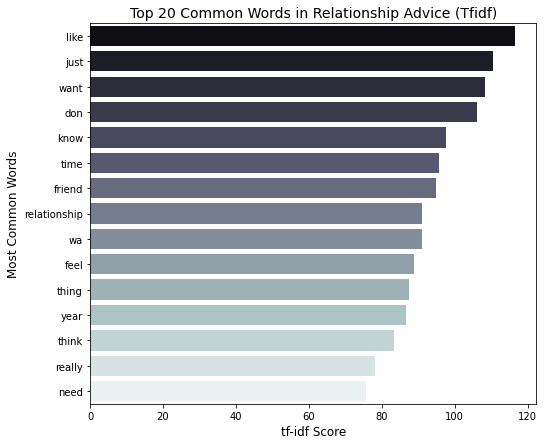

In [27]:
# plot top 20 words in legal advice

plt.figure(figsize = (8, 7))

sns.barplot(most_common_relationship[1][:15], most_common_relationship[0][:15], palette = 'bone')
plt.xlabel('tf-idf Score', size = 12)
plt.ylabel('Most Common Words', size = 12)
plt.title('Top 20 Common Words in Relationship Advice (Tfidf)', size = 14)
plt.savefig('./images/most_common_relationship_tf20.png');